In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
import scipy.fftpack as sf

脉冲压缩

TBP: 100
N: 800


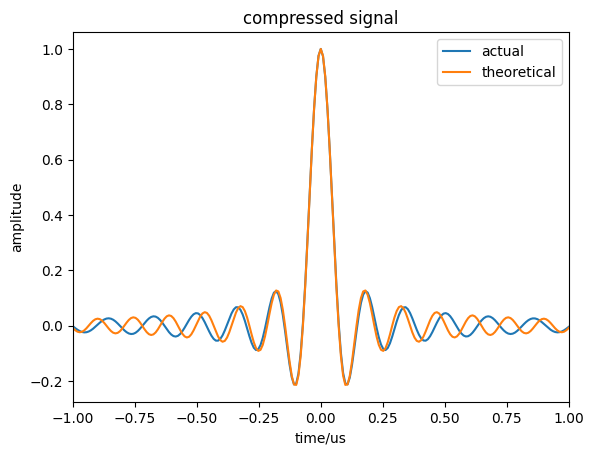

In [11]:
# T = 7.2e-6
# bandwidth = 6e+6
# K = bandwidth/T
# TBP = round(K*T**2)
# ADC_sampling_frequency = 6.2e+6
# interval_base = 1/ADC_sampling_frequency
# N = int(T*ADC_sampling_frequency)

#TBP=100, 8 oversampling
TBP = 100
T = 7.2e-6
K = TBP/(T**2)
t_c = 0
ADC_sampling_frequency = 8*K*T
interval_base = 1/ADC_sampling_frequency
N = int(T*ADC_sampling_frequency)
t_l = np.linspace(-T/2,T/2-interval_base,N)
x_chirp = np.exp(1j*np.pi*K*((t_l-t_c)**2))
print('TBP:',round(K*T**2))
print('N:',N)

h_m = np.exp(-1j*np.pi*K*((t_l+t_c)**2))
x_mf = ss.convolve(x_chirp,h_m)
x_mf_uni = x_mf/np.max(np.abs(x_mf))
t_0_idx = np.argmax(x_mf)
S_out = np.sinc(K*T*t_l)
plt.figure()
plt.plot(t_l*1e+6,np.real(x_mf_uni[t_0_idx-int(N/2):t_0_idx+int(N/2)]))
plt.plot(t_l*1e+6,S_out)
plt.title('compressed signal')
plt.xlabel('time/us')
plt.ylabel('amplitude')
plt.xlim(-1,1)
plt.legend(['actual','theoretical'])



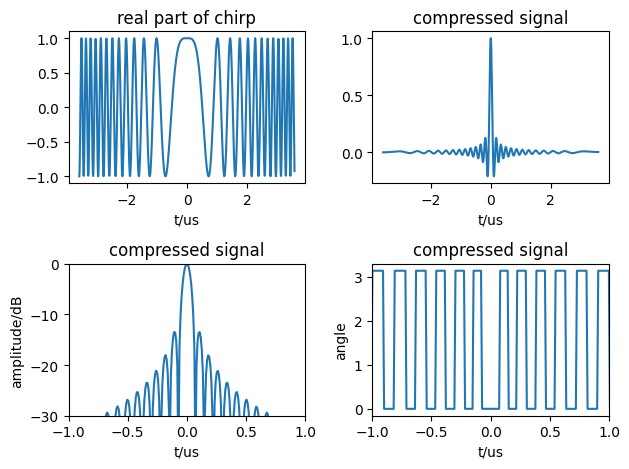

In [12]:
plt.figure()
plt.subplot(2,2,1)
plt.plot(t_l*1e+6,np.real(x_chirp))
plt.xlabel('t/us')
plt.title('real part of chirp')

plt.subplot(2,2,2)
plt.plot(t_l*1e+6,np.real(x_mf_uni[t_0_idx-int(N/2):t_0_idx+int(N/2)]))
plt.xlabel('t/us')
plt.title('compressed signal')

plt.subplot(2,2,3)
plt.plot(t_l*1e+6,20*np.log10(np.abs(x_mf_uni[t_0_idx-int(N/2):t_0_idx+int(N/2)])))
plt.xlabel('t/us')
plt.ylabel('amplitude/dB')
plt.xlim(-1,1)
plt.ylim(-30,0)
plt.title('compressed signal')


plt.subplot(2,2,4)
x_angle = np.remainder(np.unwrap(np.angle((x_mf_uni[t_0_idx-int(N/2):t_0_idx+int(N/2)]))),2*np.pi)
x_angle = np.abs(np.abs(x_angle-np.pi)-np.pi)
plt.plot(t_l*1e+6,x_angle)
plt.xlabel('t/us')
plt.ylabel('angle')
plt.xlim(-1,1)
plt.title('compressed signal')
plt.tight_layout()


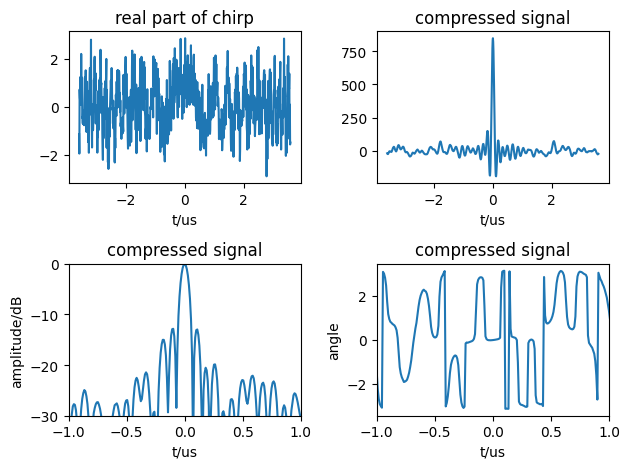

In [13]:
x_chirp_n = x_chirp + np.random.normal(0,0.75,len(x_chirp)) + 1j*np.random.normal(0,0.75,len(x_chirp)) 
x_mf_n = ss.convolve(x_chirp_n,h_m)
plt.figure()
plt.subplot(2,2,1)
plt.plot(t_l*1e+6,np.real(x_chirp_n))
plt.xlabel('t/us')
plt.title('real part of chirp')

plt.subplot(2,2,2)
plt.plot(t_l*1e+6,np.real(x_mf_n[t_0_idx-int(N/2):t_0_idx+int(N/2)]))
plt.xlabel('t/us')
plt.title('compressed signal')

plt.subplot(2,2,3)
plt.plot(t_l*1e+6,20*np.log10(np.abs(x_mf_n[t_0_idx-int(N/2):t_0_idx+int(N/2)])\
                              /np.max(np.abs(x_mf_n[t_0_idx-int(N/2):t_0_idx+int(N/2)]))))
plt.xlabel('t/us')
plt.ylabel('amplitude/dB')
plt.xlim(-1,1)
plt.ylim(-30,0)
plt.title('compressed signal')

plt.subplot(2,2,4)
plt.plot(t_l*1e+6,np.unwrap(np.angle((x_mf_n[t_0_idx-int(N/2):t_0_idx+int(N/2)])),discont=2.1*np.pi))
plt.xlabel('t/us')
plt.ylabel('angle')
plt.xlim(-1,1)
plt.title('compressed signal')
plt.tight_layout()


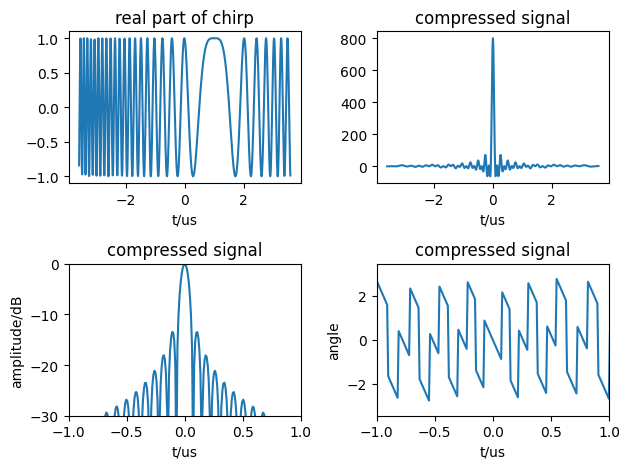

In [14]:
t_c = 1e-6
x_chirp_shift = np.exp(1j*np.pi*K*((t_l-t_c)**2))
h_m_s = np.exp(-1j*np.pi*K*((t_l+t_c)**2))
x_mf_s = ss.convolve(x_chirp_shift,h_m_s)
x_mf_uni_s = x_mf_s/np.max(np.abs(x_mf_s))
plt.figure()
plt.subplot(2,2,1)
plt.plot(t_l*1e+6,np.real(x_chirp_shift))
plt.xlabel('t/us')
plt.title('real part of chirp')

plt.subplot(2,2,2)
plt.plot(t_l*1e+6,np.real(x_mf_s[t_0_idx-int(N/2):t_0_idx+int(N/2)]))
plt.xlabel('t/us')
plt.title('compressed signal')

plt.subplot(2,2,3)
plt.plot(t_l*1e+6,20*np.log10(np.abs(x_mf_uni_s[t_0_idx-int(N/2):t_0_idx+int(N/2)])))
plt.xlabel('t/us')
plt.ylabel('amplitude/dB')
plt.xlim(-1,1)
plt.ylim(-30,0)
plt.title('compressed signal')

plt.subplot(2,2,4)
plt.plot(t_l*1e+6,(np.angle((x_mf_s[t_0_idx-int(N/2):t_0_idx+int(N/2)]))))
plt.xlabel('t/us')
plt.ylabel('angle')
plt.xlim(-1,1)
plt.title('compressed signal')
plt.tight_layout()

Text(0.5, 1.0, 'imag')

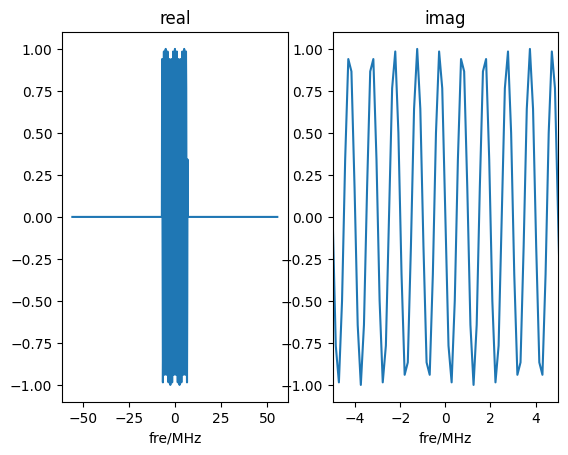

In [15]:
t_0 = 1e-6
f_l = np.linspace(-0.5*ADC_sampling_frequency,0.5*ADC_sampling_frequency -ADC_sampling_frequency/N, N)
f_width = int(0.5*K*T/(ADC_sampling_frequency/N))
S_f = np.zeros_like(f_l,dtype=np.complex128)
S_f[int(N/2)-f_width:int(N/2)+f_width] = np.exp(-1j*2*np.pi*f_l*t_0)[int(N/2)-f_width:int(N/2)+f_width]
plt.figure()
plt.subplot(1,2,1)
plt.plot(f_l*1e-6,np.real(S_f))
# plt.xlim(-5,5)
plt.xlabel('fre/MHz')

plt.title('real')

plt.subplot(1,2,2)
plt.plot(f_l*1e-6,np.imag(S_f))
plt.xlim(-5,5)
plt.xlabel('fre/MHz')

plt.title('imag')

c:\Users\tzl\.conda\envs\dsp\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\tzl\.conda\envs\dsp\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


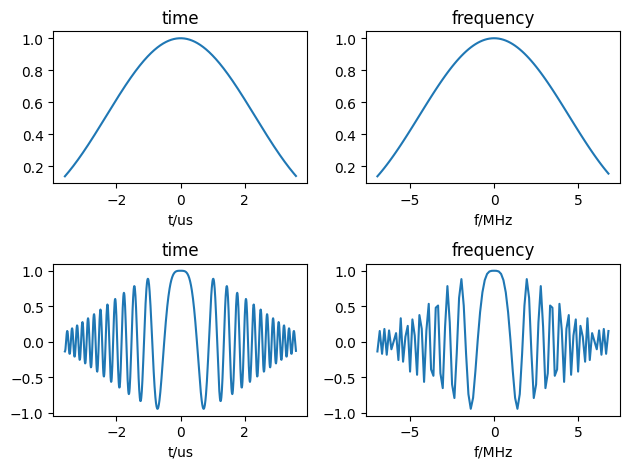

In [16]:



kaiser_twin = ss.get_window(window=('kaiser',3.5),Nx=N).astype(np.complex128)

kaiser_fwin = np.zeros_like(f_l,dtype=np.complex128)
N_f = int(K*T/(ADC_sampling_frequency/N)/2)
kaiser_fwin[int(N/2)-N_f:int(N/2)+N_f] = ss.get_window(window=('kaiser',3.5),Nx=2*N_f).astype(np.complex128)

h_t = kaiser_twin*np.exp(-1j*np.pi*K*((t_l)**2))
H_f = kaiser_fwin*np.exp(1j*np.pi*f_l**2/K)

plt.figure()
plt.subplot(2,2,1)
plt.plot(t_l*1e+6,kaiser_twin)
plt.xlabel('t/us')
plt.title('time')

plt.subplot(2,2,2)
plt.plot(f_l[int(N/2)-N_f:int(N/2)+N_f]*1e-6,(np.real(kaiser_fwin[int(N/2)-N_f:int(N/2)+N_f])))
plt.xlabel('f/MHz')
plt.title('frequency')

plt.subplot(2,2,3)
plt.plot(t_l*1e+6,h_t)
plt.xlabel('t/us')
plt.title('time')

plt.subplot(2,2,4)
plt.plot(f_l[int(N/2)-N_f:int(N/2)+N_f]*1e-6,(np.real(H_f[int(N/2)-N_f:int(N/2)+N_f])))
plt.xlabel('f/MHz')

plt.title('frequency')
plt.tight_layout()